In [4]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [5]:
loan_data=pd.read_csv('./loan/loan.csv')

#setting color scheme
sns.set_palette("pastel")

C:\Users\Abhinav_Awasthi1\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.



In [6]:
# Shape of data set and first 10 rows to see the data types 
print("No Of Rows-" + str(loan_data.shape[0]))
print("No Of Columns-" + str(loan_data.shape[1]))
loan_data.head(10)


No Of Rows-39717
No Of Columns-111


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
# Identify Outlier for Annual Income
loan_data.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

# Data Cleaning

In [8]:
# Outliers for Annual Income

outliers=loan_data[loan_data.annual_inc>150000]
loan_data = loan_data[~(loan_data.annual_inc>150000)]

# outliers in annual inc
# to be displayed in non scientific value
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
# drop column which have more than 40% of data as null

def calculatePercNullValues(column):
    return (loan_data[column].isnull().sum()/len(loan_data)*100)

columns_withnulls=[(column) for column in loan_data.columns if calculatePercNullValues(column)>30.0]
loan_data.drop(columns_withnulls,axis=1, inplace=True)

In [10]:
# removing columns which are insignifact to the analysis
insignificant_columns=['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','policy_code','acc_now_delinq',
                        'delinq_amnt','pymnt_plan','revol_util','last_credit_pull_d','last_pymnt_d','last_credit_pull_d']

loan_data.drop(insignificant_columns, axis=1, inplace=True)

In [11]:
#percentage of null values in remaining columns (if any)
columns_having_nulls=[(column,calculatePercNullValues(column),loan_data[column].isna().sum(), loan_data[column].nunique()) 
            for column in loan_data.columns if calculatePercNullValues(column)>0]

df_analyze=pd.DataFrame(columns_having_nulls, columns=['Attribute','Null%','No Of Null Rows','Unique Values'])
df_analyze.sort_values(['No Of Null Rows'], ascending=False)

,Attribute,Null%,No Of Null Rows,Unique Values
0,emp_title,6.04465,2307,27876
1,emp_length,2.77472,1059,11
3,pub_rec_bankruptcies,1.75287,669,3
2,title,0.02882,11,18967


In [12]:

# removing null rows for emp_title,emp_length,title (from above table)

loan_data=loan_data[~loan_data['emp_title'].isna()==True]
loan_data.emp_title = loan_data['emp_title'].astype(str)

loan_data=loan_data[~loan_data['emp_length'].isna()==True]
loan_data['emp_length'] = loan_data.emp_length.apply(lambda x: re.sub('[+ years year <]', '', str(x),))
loan_data.emp_length = loan_data['emp_length'].astype(int)

loan_data.int_rate=loan_data.int_rate.apply(lambda x: x.replace('%',''))
loan_data.int_rate=loan_data.int_rate.astype(float)

loan_data = loan_data[~loan_data['title'].isna()==True]
loan_data.title = loan_data['title'].astype(str)

In [13]:
# Deriving new columns
# 1. Loan Term
loan_data.term = loan_data.term.apply(lambda x: x.replace('months',''))
loan_data.term=loan_data.term.astype(int)

# 2. Income Range
loan_data['income_range']=pd.qcut(loan_data.annual_inc, [0,0.25,0.50,0.75,1],['Low', 'Medium', 'High','V.High'])

In [14]:
# deriving new column for loan issued year
loan_data['year']= loan_data.issue_d.apply(lambda x: '20'+str(x[-2:]))
loan_data.year=loan_data.year.astype(int)

#Outliers data
outliers['year']= outliers.issue_d.apply(lambda x: '20'+str(x[-2:]))
outliers.year=outliers.year.astype(int)


#sort data as ascending order for Year, Grade column
loan_data.sort_values(['year','grade', 'emp_length'], ascending=True).reset_index(drop=True)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,application_type,pub_rec_bankruptcies,income_range,year
0,189379,179800,2800,2800,1100.00000,36,7.43000,87.01000,A,A2,...,2800.00000,112.21000,0.00000,0.00000,0.00000,2391.23000,INDIVIDUAL,NaN,Low,2007
1,183936,183930,5800,5800,1800.00000,36,7.43000,180.23000,A,A2,...,5800.00000,613.83000,0.00000,0.00000,0.00000,253.09000,INDIVIDUAL,NaN,Medium,2007
2,171298,171282,7000,7000,1000.00000,36,7.43000,217.52000,A,A2,...,7000.00000,830.67000,0.00000,0.00000,0.00000,225.50000,INDIVIDUAL,NaN,Medium,2007
3,149575,149552,10000,10000,2750.00000,36,8.38000,315.12000,A,A5,...,10000.00000,1121.69000,0.00000,0.00000,0.00000,19.94000,INDIVIDUAL,NaN,Low,2007
4,137965,137952,8000,8000,3475.00000,36,8.38000,252.10000,A,A5,...,8000.00000,1013.50000,0.00000,0.00000,0.00000,2222.28000,INDIVIDUAL,NaN,V.High,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35789,678853,867248,24000,24000,23993.94291,60,20.48000,642.29000,G,G2,...,24000.00000,9720.94000,0.00000,0.00000,0.00000,16418.19000,INDIVIDUAL,0.00000,V.High,2011
35790,671416,858334,24000,24000,23975.00000,60,20.85000,647.26000,G,G3,...,2758.89000,5261.24000,0.00000,761.33000,8.03000,320.00000,INDIVIDUAL,0.00000,High,2011
35791,665644,851048,6200,6200,6200.00000,36,21.59000,235.47000,G,G5,...,1789.07000,1263.44000,0.00000,0.00000,0.00000,470.94000,INDIVIDUAL,0.00000,High,2011
35792,619498,794020,25000,25000,24896.23359,60,20.85000,674.23000,G,G3,...,25000.00000,6043.31000,0.00000,0.00000,0.00000,21615.46000,INDIVIDUAL,0.00000,High,2011


In [15]:
# Classify Bad Loan

bad_loan= loan_data[(loan_data.loan_status=='Charged Off')]

# Univariate Analysis

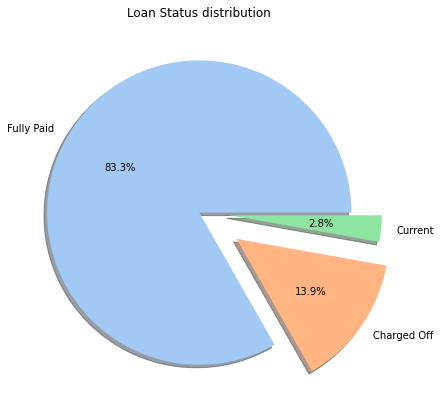

In [16]:
# Overall Data Distribution (by Loan Status)

plt.figure(figsize=(20,7), facecolor='white')
plt.pie(loan_data.loan_status.value_counts(),
        labels=loan_data.loan_status.value_counts().index.tolist(), 
        explode=[0,0.3,0.2], autopct='%.1f%%', shadow=True)
plt.title('Loan Status distribution')
plt.show()

## Distribution of Loan Amount grouped by Grade

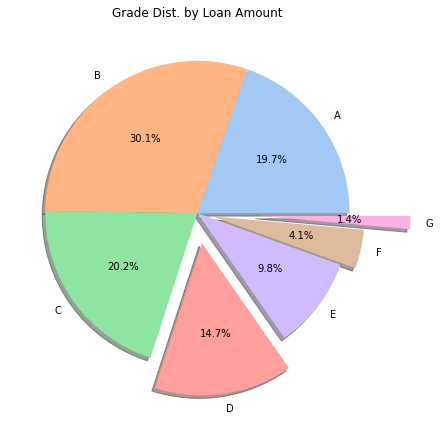

In [17]:
plt.figure(figsize=(15,7), facecolor='white')
plt.pie(loan_data.groupby('grade').loan_amnt.sum(), 
        labels=loan_data.groupby('grade').loan_amnt.sum().index.tolist(), 
        explode=[0,0,0,0.2,0,0.1,0.4], autopct='%.1f%%', shadow=True)

plt.title("Grade Dist. by Loan Amount")
plt.show()

<u>Summary</u><br>
    1. Major protion went to lower grades <br>
    2. 50% loan was given to lower grades- C,D,E,F

## Bad Loan distribution as per grade, year and verification status

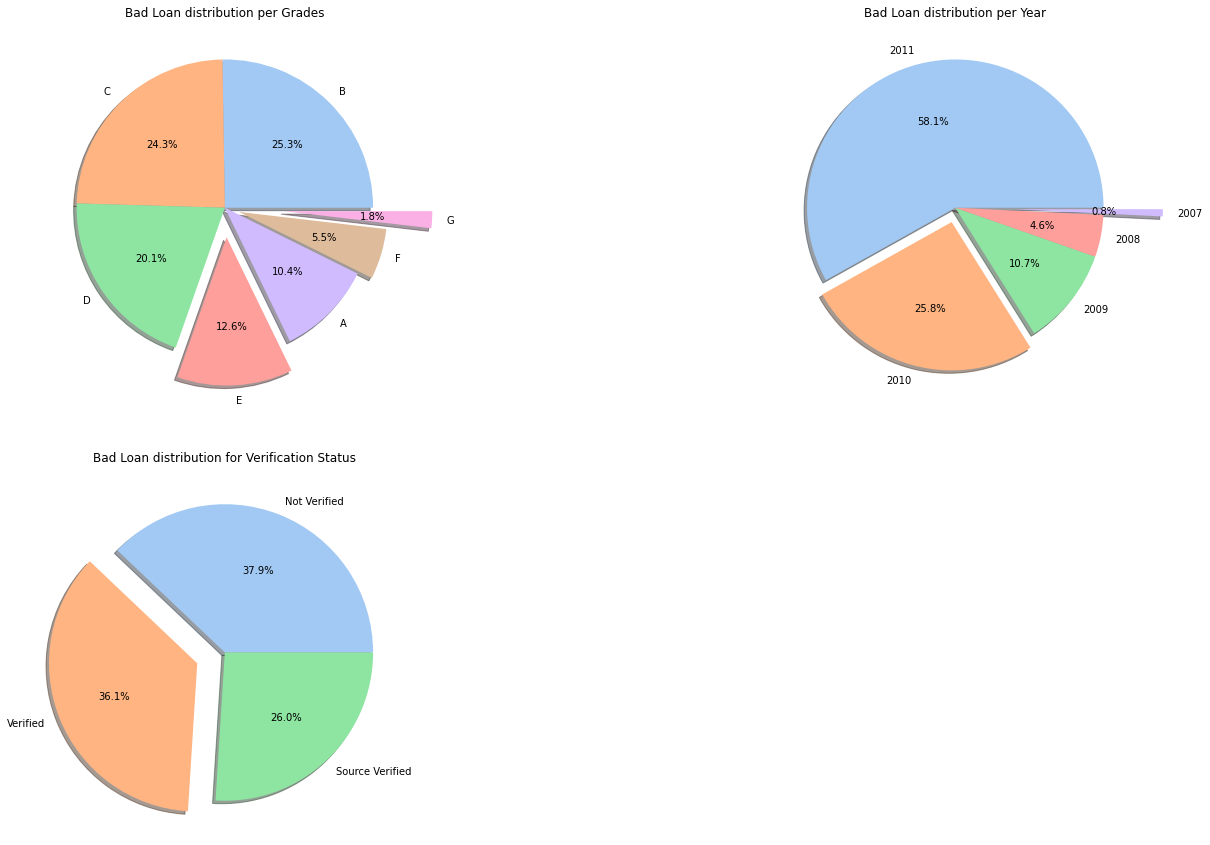

In [18]:
plt.figure(figsize=(24,15), facecolor='white')

plt.subplot(2,2,1)

plt.pie(bad_loan.grade.value_counts(),
        labels=bad_loan.grade.value_counts().index.tolist(), 
        explode=[0,0,0,0.2,0,0.1,0.4], autopct='%.1f%%', shadow=True)
plt.title('Bad Loan distribution per Grades')

plt.subplot(2,2,2)
plt.pie(bad_loan.year.value_counts(),
        labels=bad_loan.year.value_counts().index.tolist(), 
        explode=[0,0.1,0,0,0.4], autopct='%.1f%%', shadow=True)
plt.title('Bad Loan distribution per Year')

plt.subplot(2,2,3)

plt.pie(bad_loan.verification_status.value_counts(),
        labels=bad_loan.verification_status.value_counts().index.tolist(), 
        explode= [0,0.2,0], autopct='%.1f%%', shadow=True)
plt.title('Verification Status Distribution')
plt.title('Bad Loan distribution for Verification Status')
plt.show()


<u>Summary(Bad Loan)</u><br>
   1. ~60% loan was given to grades lower than B <br>
   2. More than half of the amount was given in 2011 <br>
   3. 36% of the bad loan was not verified

## Analyzing variables - Verification Status, Employment Length for Bad Loan

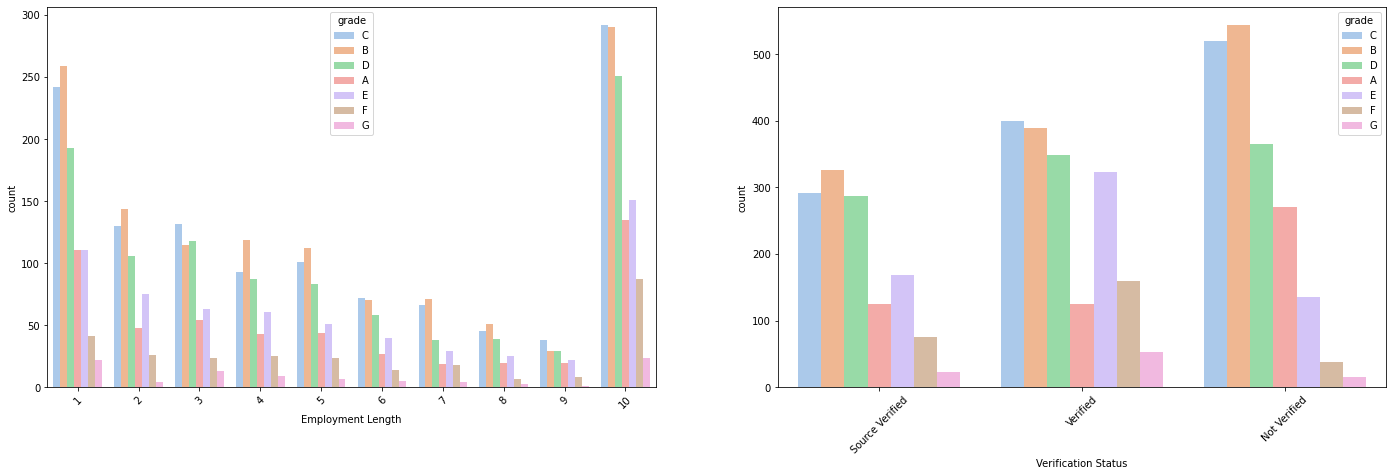

In [19]:
plt.figure(figsize=(24,7))

plt.subplot(1, 2, 1)
sns.countplot(x='emp_length', data=bad_loan, hue='grade')
plt.xlabel('Employment Length')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='verification_status', data=bad_loan, hue='grade')
plt.xticks(rotation=45)
plt.xlabel('Verification Status')
plt.show()


# Bivariate Analysis

##  Loan Distribution over the year wrt the loan amount categorised by the grades

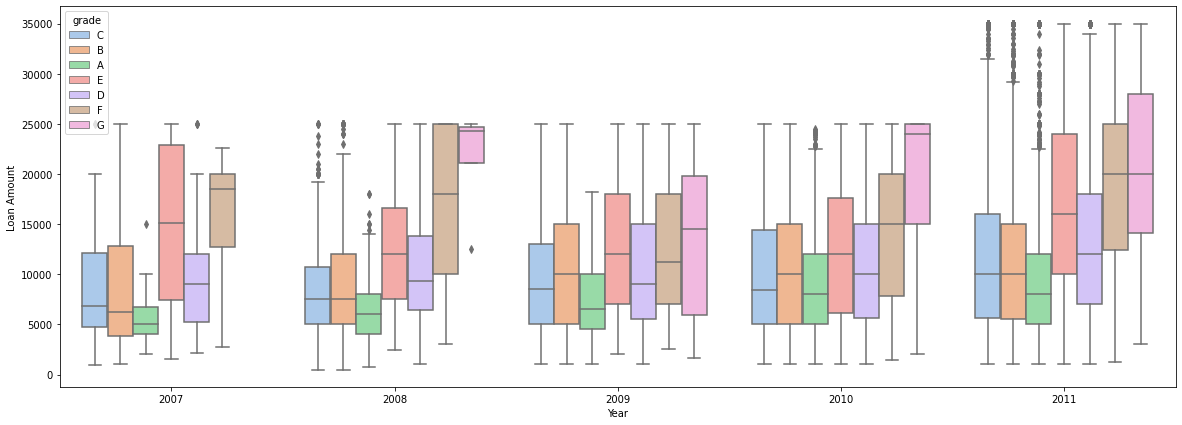

In [20]:
#plotting loan disbursement over the years seggregated as per grades
plt.figure(figsize=[20,7])
sns.boxplot(data=loan_data, x='year', y='loan_amnt', hue='grade')
plt.xlabel('Year')
plt.ylabel('Loan Amount')

plt.show()

<u>Summary</u>: Higher value of loan amount >25k was given to lower grades in 2011

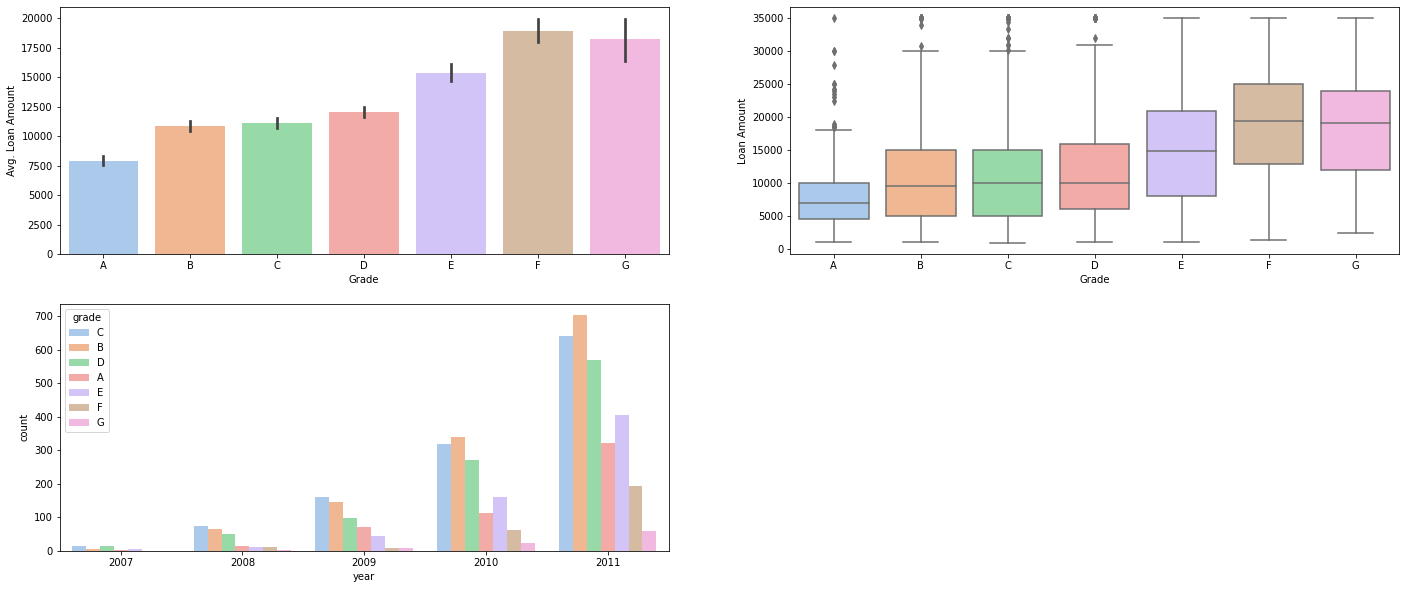

In [21]:
# Detailed graphical representation of the Bad Loan data

plt.figure(figsize=[24,10])
plt.subplot(2,2,1)
sns.barplot(data=bad_loan, x='grade', y= 'loan_amnt', order=loan_data.grade.value_counts().index.sort_values())
plt.xlabel('Grade')
plt.ylabel('Avg. Loan Amount')

plt.subplot(2,2,2)
sns.boxplot(data=bad_loan, x='grade', y='loan_amnt', order=loan_data.grade.value_counts().index.sort_values())
plt.xlabel('Grade')
plt.ylabel('Loan Amount')

plt.subplot(2,2,3)
sns.countplot(data=bad_loan, x= 'year', hue='grade')
plt.show()

<u>Summary</u><br>
    1. Average loan disbursement over the years has been to the borrowers who had lower grade.<br>
    2. This can be due to the fact that after the economic melt down of 2009, more customers fell into the lower grade buckets.<br>
    
Lets analyse the trend as per the annual salary

## Analyzing variables - DTI and Open Credit Lines w.r.t Loan Status

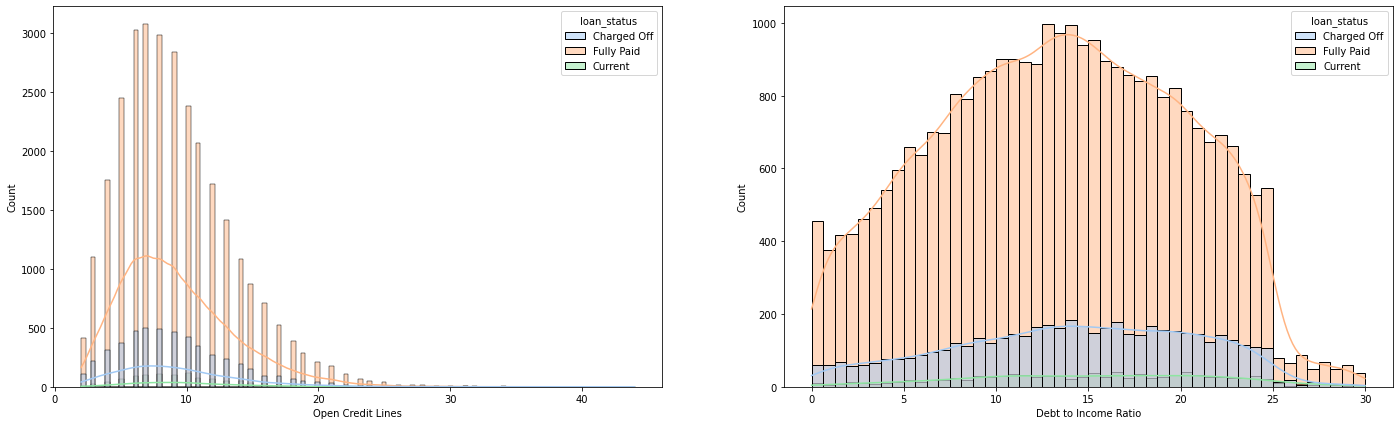

In [22]:
# DTI Distribution
plt.figure(figsize=[24,7])
plt.subplot(1,2,1)
sns.histplot(data=loan_data, x='open_acc', hue='loan_status', kde=True)
plt.xlabel('Open Credit Lines')

plt.subplot(1,2,2)
sns.histplot(data=loan_data, x='dti', hue='loan_status', kde=True)
plt.xlabel('Debt to Income Ratio')
plt.show()


<u>Summary</u><br>
    1. Open credit lines with values between 6-10 have higher probability of defaults.<br>
    2. DTI value between 12-16 have higher chanceof defaults.

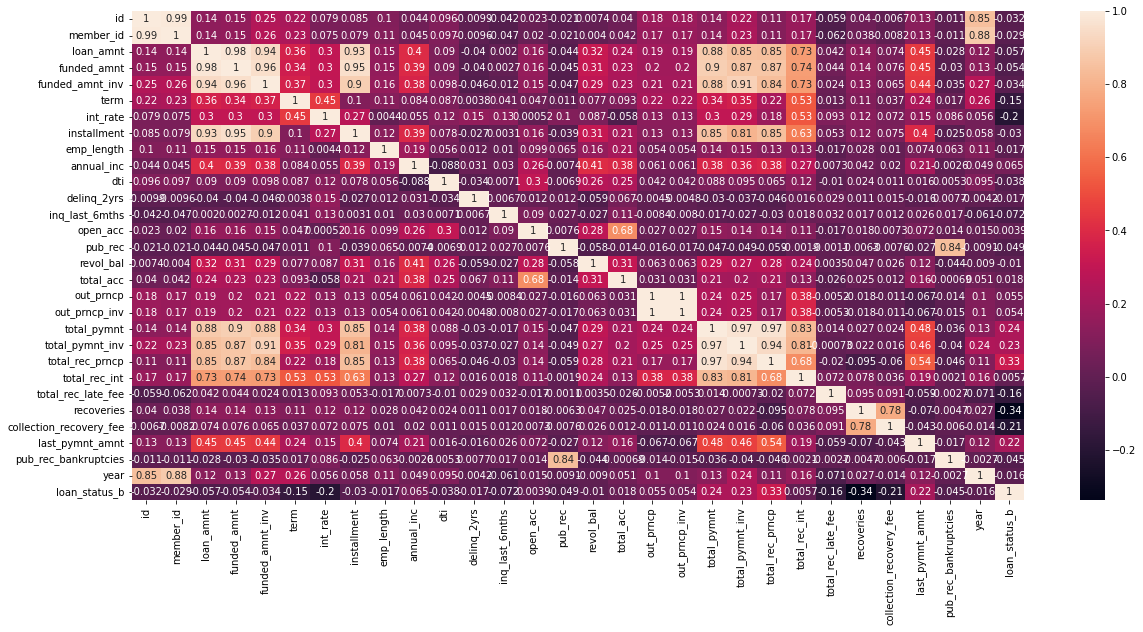

In [23]:
loan_data['loan_status_b']=loan_data.loan_status.apply(lambda x: 0 if x=="Charged Off" else 1)

plt.figure(figsize=[20,9])
sns.heatmap(loan_data.corr(), annot=True)
plt.show()


<u>Summary</u>: High corre;lation between loan amount and funded amount. So when plotted these variables will have same distribution

# Analyze impact of annual income on grade and loan status
## Derived Variable - Income Range

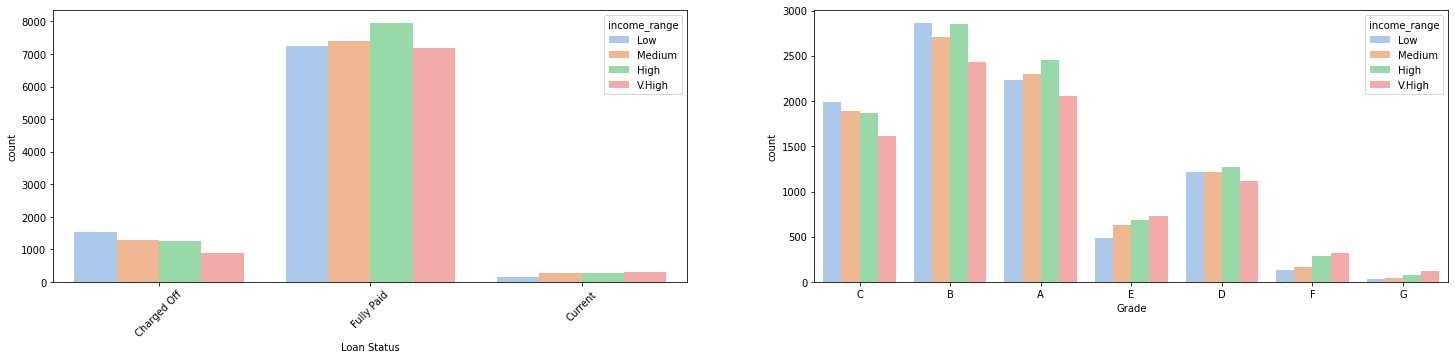

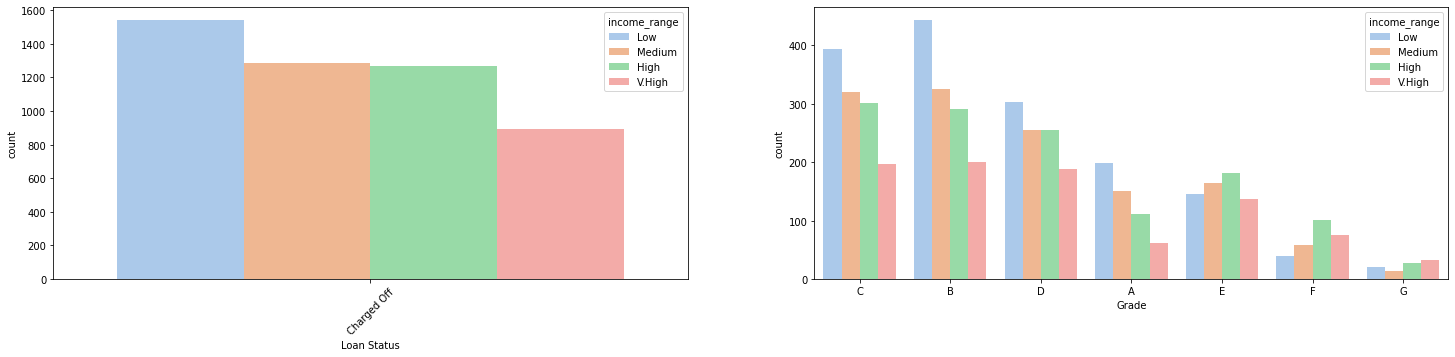

In [24]:
def plotAnnualIncome(data):
    plt.figure(figsize=(25,5))

    plt.subplot(1, 2, 1)
    sns.countplot(x='loan_status', data=data, hue='income_range')
    plt.xlabel('Loan Status')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sns.countplot(x='grade', data=data, hue='income_range')
    plt.xlabel('Grade')
    plt.show()

plotAnnualIncome(loan_data)
plotAnnualIncome(bad_loan)

# Analyzing Outliers

In [25]:
outliers_badLoan=outliers[outliers.loan_status=='Charged Off']

<Figure size 1800x720 with 0 Axes>

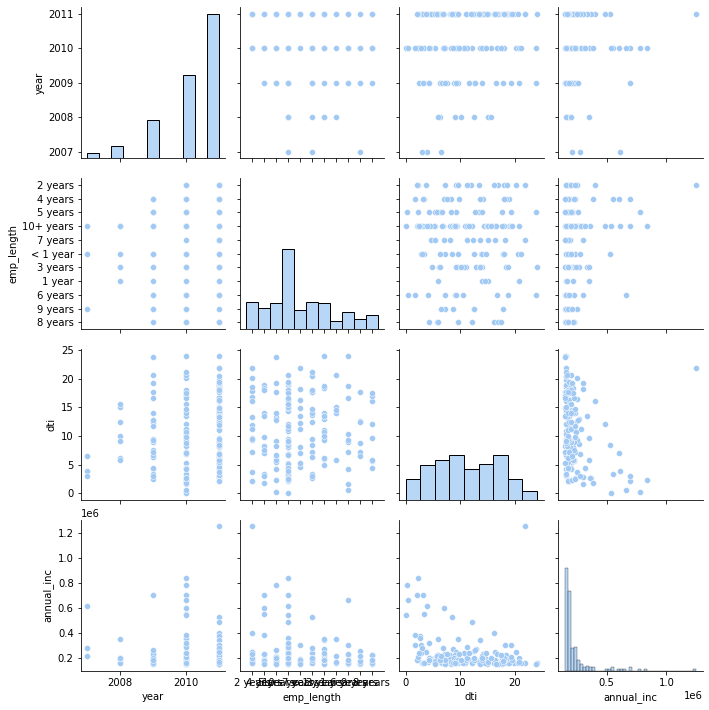

In [26]:
# from the data its clear the bad loan amongst the high income individuals is in the year 2011 
#   where the loan was availed for debt_consolidation/credit card small business
# now analysing the dti for this data

plt.figure(figsize=[25,10])
sns.pairplot(data=outliers_badLoan, vars=['year','emp_length','dti','annual_inc'])
plt.show()

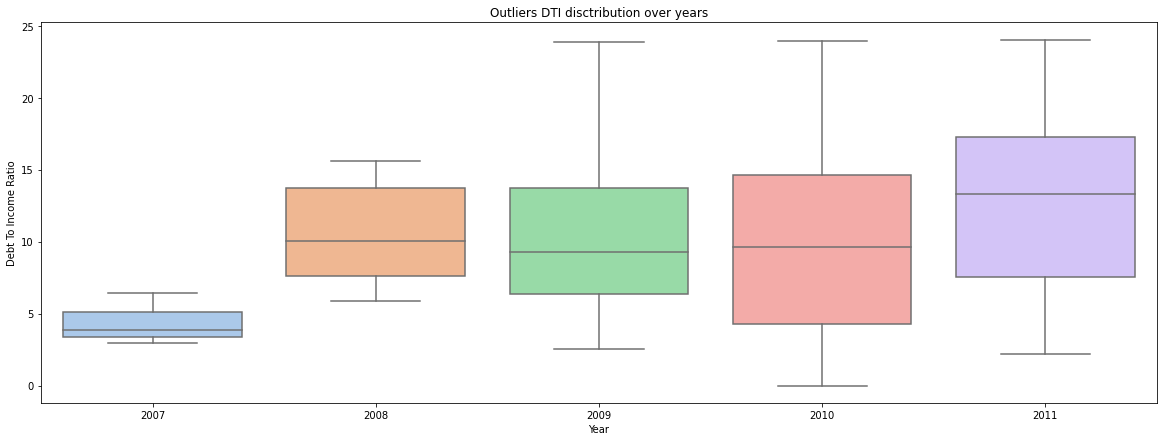

In [27]:
plt.figure(figsize=[20,7])
sns.boxplot(data=outliers_badLoan, x='year', y='dti')
plt.xlabel('Year')
plt.ylabel('Debt To Income Ratio')
plt.title("Outliers DTI disctribution over years")
plt.show()

<u>Summary</u>: For very high annual salary too the DTI have is up in 2011. The mean is as high as ~15% while 75 percentile customer have interest rate >20%

# Current Accounts

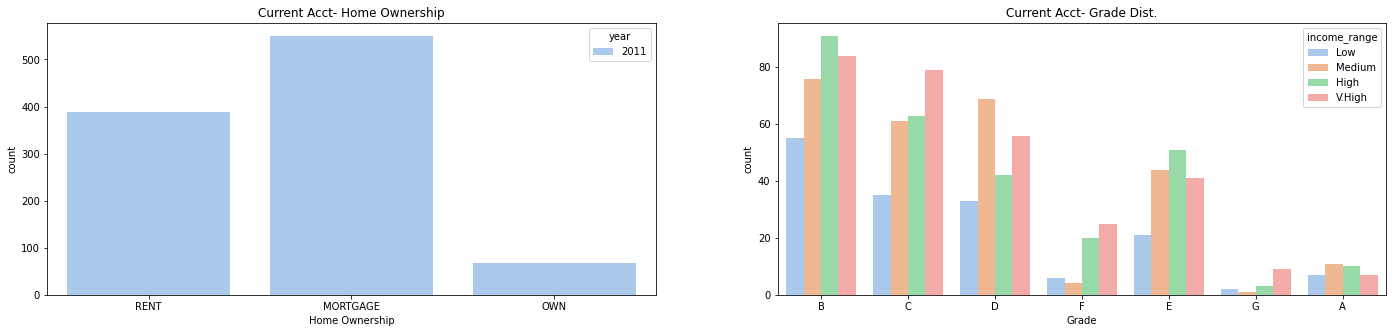

In [28]:
#filter active loan accounts and the distrinution of imporatnt variables in data
current=loan_data[loan_data.loan_status=='Current']

plt.figure(figsize=[24,5])

plt.subplot(1,2,1)
sns.countplot(data=current, x='home_ownership', hue='year')
plt.xlabel("Home Ownership")
plt.title('Current Acct- Home Ownership')

plt.subplot(1,2,2)
sns.countplot(data=current, x='grade', hue='income_range')
plt.xlabel("Grade")
plt.title('Current Acct- Grade Dist.')

plt.show()


<u>Summary</u>: Current account also showing same trend as band loan where lower grades getting more chunks of loan. Hence there can be default. No. of mortgaged and rentals is also high.

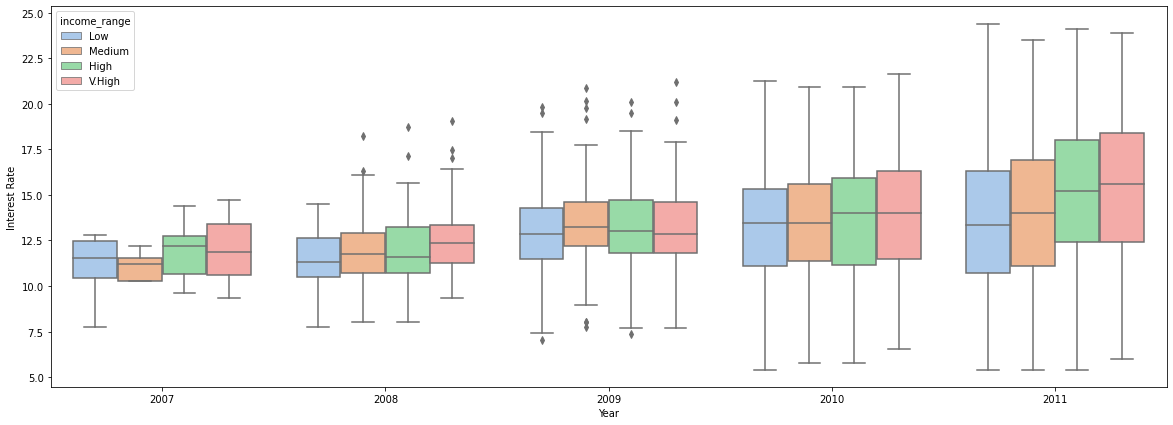

In [29]:
# Interest Rate in Bad Loan data

plt.figure(figsize=[20,7])
sns.boxplot(data=bad_loan, x=bad_loan.year, y=bad_loan.int_rate, hue='income_range')
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.show()

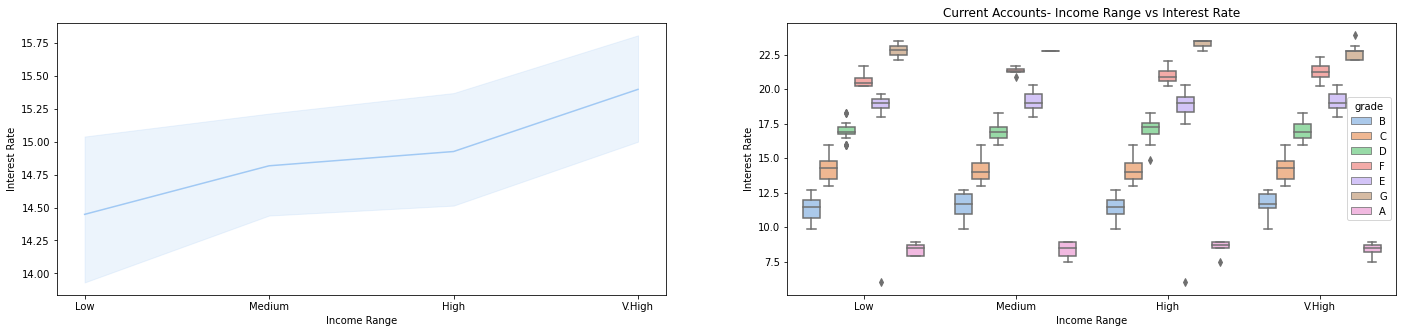

In [30]:
plt.figure(figsize=[24,5])
plt.subplot(1,2,1)

sns.lineplot(data=current, y='int_rate', x='income_range')
plt.xlabel('Income Range')
plt.ylabel("Interest Rate")

plt.subplot(1,2,2)
sns.boxplot(data=current, x='income_range', y='int_rate', hue='grade')
plt.xlabel('Income Range')
plt.ylabel("Interest Rate")
plt.title('Current Accounts- Income Range vs Interest Rate')
plt.show()


<u>Summary</u>: Interest loan has been increasing with year. And with higher salary the rate is as high as 22%

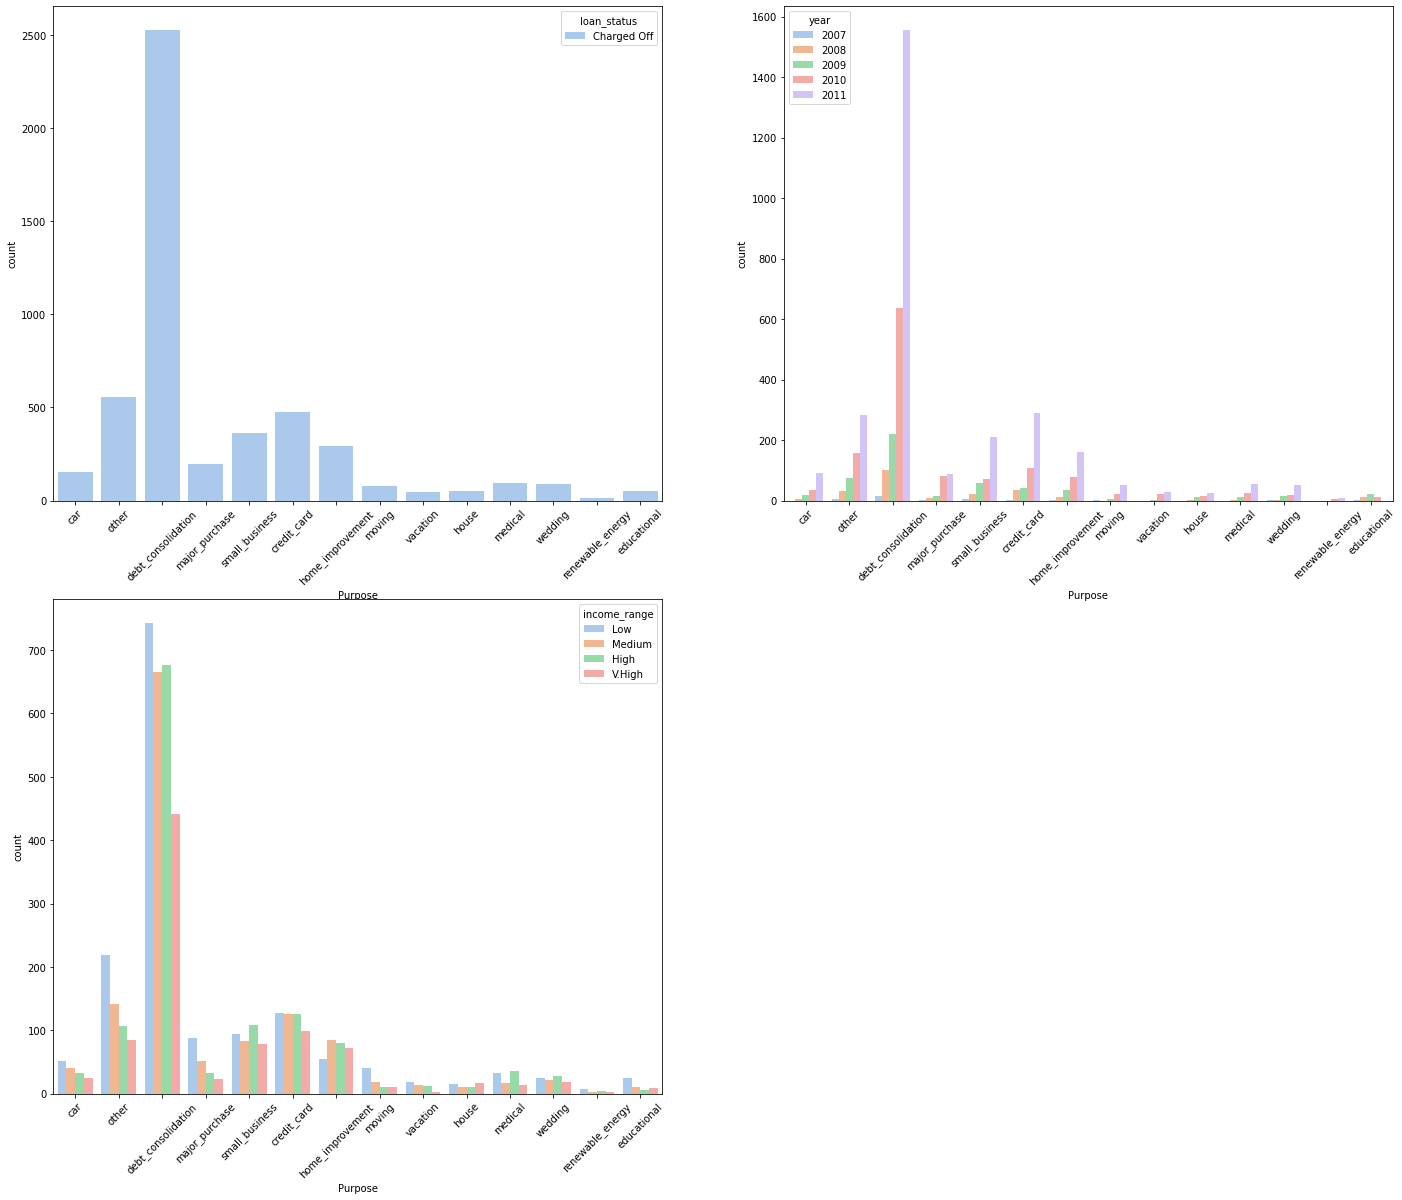

In [31]:
## Analyzing the variable Loan Purpose wrt Loan Status, Year and Income Range

plt.figure(figsize=[24,20])
plt.subplot(2,2,1)
sns.countplot(data=bad_loan, x=bad_loan.purpose, hue='loan_status')
plt.xlabel('Purpose')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.countplot(data=bad_loan, x=bad_loan.purpose, hue='year')
plt.xlabel('Purpose')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.countplot(data=bad_loan, x=bad_loan.purpose, hue='income_range')
plt.xlabel('Purpose')
plt.xticks(rotation=45)

plt.show()

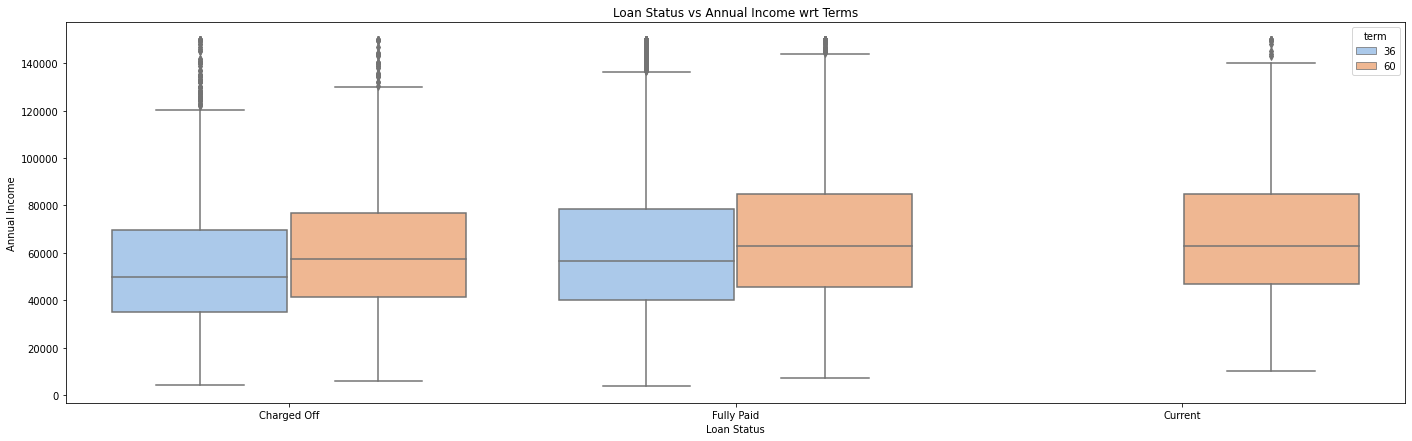

In [32]:
# Analysing payment terms across the loan applications
#distribution of term wrt other variables like - Loan Status, Income Range
#sns.countplot(data=loan_data, x='loan_status', hue='term' )

plt.figure(figsize=[24,7])
sns.boxplot(data=loan_data, x='loan_status', y='annual_inc', hue='term')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.title('Loan Status vs Annual Income wrt Terms')
plt.show()

<u>Summary</u><br>
    1. Across all the years and income range debt consolidation was the single reason in maximum applications.<br>
    2. For Bad loans customers opted for larger duration to repay.<br>
    3. Similar trend can be seen in current loan as well.

## Distribution of data for Derogatory Public Records and Public Record Bankrupties 

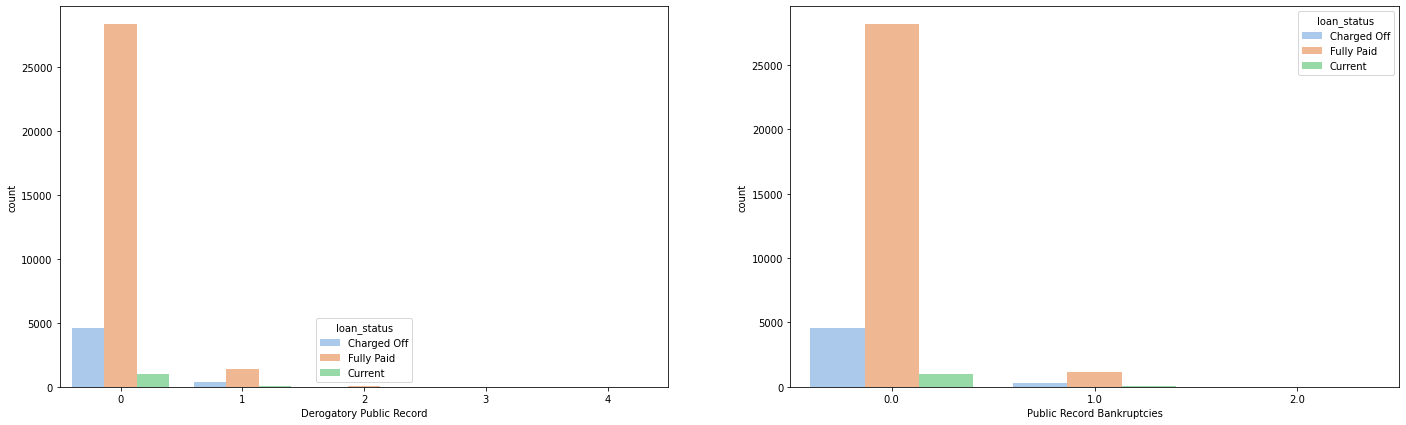

In [33]:
plt.figure(figsize=[24,7])
plt.subplot(1,2,1)
sns.countplot(data=loan_data, x='pub_rec', hue='loan_status')
plt.xlabel('Derogatory Public Record')

plt.subplot(1,2,2)
sns.countplot(data=loan_data, x='pub_rec_bankruptcies', hue='loan_status')
plt.xlabel('Public Record Bankruptcies')
plt.show()

## Distribution of Home Ownership as per Loan Status and Year 

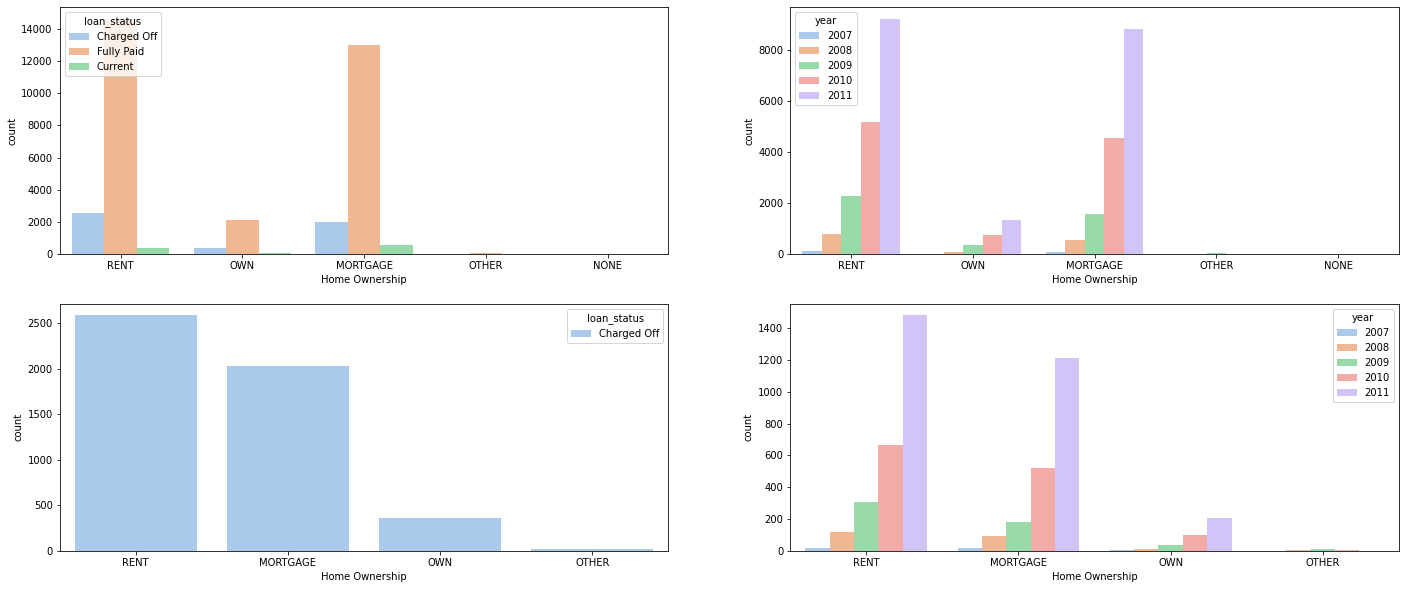

In [34]:
plt.figure(figsize=[24,10])
plt.subplot(2,2,1)
sns.countplot(data=loan_data, x='home_ownership', hue='loan_status')
plt.xlabel('Home Ownership')

plt.subplot(2,2,2)
sns.countplot(data=loan_data, x='home_ownership', hue='year')
plt.xlabel('Home Ownership')

plt.subplot(2,2,3)
sns.countplot(data=bad_loan, x='home_ownership', hue='loan_status')
plt.xlabel('Home Ownership')

plt.subplot(2,2,4)
sns.countplot(data=bad_loan, x='home_ownership', hue='year')
plt.xlabel('Home Ownership')

plt.show()

# Bad Loan Disribution across states
<u>Data displayed for each state</u>- <br>
       1. Averge Annual Income <br>
       2. Average Loan amnt <br>
       3. No Of Loan Applications

In [35]:

coll_total_loan=bad_loan.groupby('addr_state',as_index=False).loan_amnt.sum()
coll_loan=bad_loan.groupby('addr_state',as_index=False).loan_amnt.mean()
coll_salary=bad_loan.groupby('addr_state',as_index=False).annual_inc.mean()
coll_interestRate=bad_loan.groupby('addr_state',as_index=False).int_rate.mean()
coll_loanApplicatons=bad_loan.groupby('addr_state',as_index=False).id.count()

states=coll_total_loan['addr_state'].values.tolist()
totalLoan=coll_total_loan['loan_amnt'].values.tolist()
av_loan=coll_loan['loan_amnt'].values.tolist()
av_salary=coll_salary['annual_inc'].values.tolist()
av_interestRate=coll_interestRate['int_rate'].values.tolist()
loan_applications=coll_loanApplicatons['id'].values.tolist()

from collections import OrderedDict

metrics_data = OrderedDict([('state_codes', states),
                            ('total_loan', totalLoan),
                            ('av_loan', av_loan),
                            ('av_salary', av_salary),
                            ('av_interestRate', av_interestRate),
                            ('loan_applications', loan_applications)])
                     

badLoan_metrics = pd.DataFrame.from_dict(metrics_data)
badLoan_metrics = badLoan_metrics.round(decimals=2)

badLoan_metrics['text']=[row['state_codes']+'<br>'+'Annual Income:'+str(row['av_salary'])+'<br>' +'Loan Amount:' + str(row['av_loan'])+ "<br>"+"No Of Applications:"+ str(row['loan_applications']) for _,row in badLoan_metrics.iterrows()]



data = [ dict(
        type='choropleth',
        colorscale='Viridis',
        locations = badLoan_metrics['state_codes'],
        z = badLoan_metrics['total_loan'], 
        locationmode = 'USA-states',
        text = badLoan_metrics['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]

layout = dict(
    title = 'Bad Loans (Total Loan Amount for each State)',
    geo = dict(        
        scope = 'usa',
        projection=dict(type='craig'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)
fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

In [36]:
#Total Loan Amount grouped by the state
metrics_data['total_loan']=coll_total_loan['loan_amnt']

#derived column to analyze the distribution of bad loan with unverified applications

bad_loan['is_verified']=bad_loan.verification_status.apply(lambda x: 0 if x=='Not Verified' else 1)

C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_5100/1299239956.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



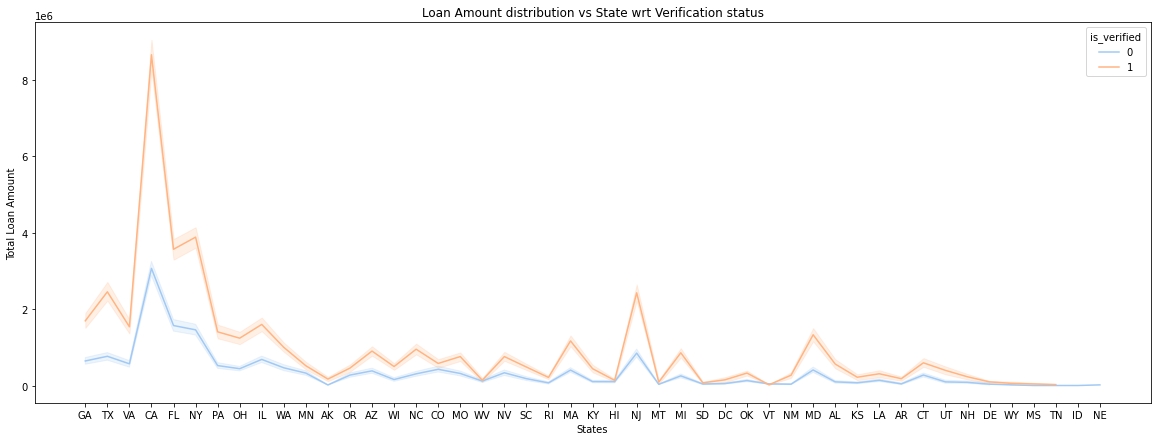

In [37]:
plt.figure(figsize=[20,7])
sns.lineplot(data=bad_loan, x='addr_state', y='loan_amnt', hue='is_verified', estimator= sum)
plt.title('Loan Amount distribution vs State wrt Verification status')
plt.xlabel('States')
plt.ylabel('Total Loan Amount')
plt.show()


<u>Summary:</u><br>    
    1. The states w.r.t the total loan amount where verification was not done are- California, Florida, New York and New Jersey <br>
    2. Wyoming state has highest average loan amount that is default. Although this state had only 3 applicants but the avg loan amount and salary range were highest
